#Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk.corpus import stopwords

nltk.download('stopwords')
stopWords = nltk.corpus.stopwords.words('portuguese')

results = pd.read_csv('results.csv')

tokenTry = RegexpTokenizer(r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})', i)

total_palavras_unidas = []
palavrasTokenizadas = []

for texto in results['text']:
  bordoes = [bordao for bordao in tokenTry.tokenize(texto.lower()) if len(bordao) >= 3 and not bool(re.search(r'\d', bordao))]
  total_palavras_unidas.extend(bordoes)

palavrasTokenizadas = [bordao for bordao in total_palavras_unidas if bordao not in stopWords]

print ("Palavras Tokenizadas: " +str(len(palavrasTokenizadas)))
print ("Palavras não Tokenizadas: " +str(len(total_palavras_unidas)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Palavras Tokenizadas: 170878
Palavras não Tokenizadas: 208658


A partir do primeiro Lab, utilizando a biblíoteca nltk e com funcionalidades do regex que aceita palavras da língua portuguesa, tokenizamos o results.csv. Colocando todas as palavras em lowerCase e tirando palavras que não contém muito significado nas quais estão contidas dentro das 'stopwords', conjunto de palavras promovido pelo nltk.

#Refaça a questão 2 do Laboratório anterior usando os tokens produzidos

In [0]:
ocorrenciaTotal = len(palavrasTokenizadas)
try_words = Counter(palavrasTokenizadas)

as_50_mais = try_words.most_common()
ranked = 1
tabela = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela['Word'] = [p[0] for p in as_50_mais]
tabela['Frequency'] = [p[1] for p in as_50_mais]
tabela['r'] = [r + 1 for r in range(0, len(as_50_mais))]
tabela['Pr(%)'] = [round((p[1] / ocorrenciaTotal) *100, 2) for p in as_50_mais]
tabela['r.Pr'] = round((tabela['Pr(%)']/100)*tabela['r'], 3)

tabela.head(50)

,Word,Frequency,r,Pr(%),r.Pr
0,de,7804,1,4.57,0.046
1,a,4712,2,2.76,0.055
2,o,3783,3,2.21,0.066
3,e,3028,4,1.77,0.071
4,do,2976,5,1.74,0.087
5,da,2587,6,1.51,0.091
6,em,1903,7,1.11,0.078
7,um,1327,8,0.78,0.062
8,os,1327,9,0.78,0.070
9,se,1265,10,0.74,0.074


#Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.

In [0]:
stemming_palavras = []
stemmezation = nltk.stem.SnowballStemmer('portuguese')

stemming_palavras = [stemmezation.stem(bordao) for bordao in palavrasTokenizadas]

stemeed = sorted(set(stemming_palavras))
set_palavras_unidas = sorted(set(total_palavras_unidas))

print("Palavras nas quais não contem Stemming:",len(set_palavras_unidas))
print("Palavras nas quais contem Stemming:",len(stemeed))

print(stemeed)
print(set_palavras_unidas)

Palavras nas quais não contem Stemming: 25325
Palavras nas quais contem Stemming: 14461
['   ', '    ', '      e ', '     e  ', '     e   ', '    . e as ', '    a ', '    da ', '    de ', '    do ', '    e ', '    e . ', '    e do ', '    e do\xa0', '    e o ', '    e um ', '    e é ', '    em ', '    la ', '    me ', '    na ', '    o ', '    ou ', '    ou   é ', '    se ', '    um ', '    é ', '    é o ', '    é um ', '   "', '   (', '   (“', '   - ', '   a ', '   a  na ', '   ao ', '   as ', '   da ', '   de ', '   do ', '   e ', '   e  ', '   e  à ', '   e a ', '   e o ', '   em ', '   em um ', '   ex-', '   há ', '   já ', '   na ', '   no ', '   o ', '   o de ', '   os ', '   ou ', '   ou . ', '   ou já ', '   ri ', '   se ', '   um ', '   é ', '   é  ', '   é de ', '   é um ', '   –', '   – ', '   “um ', '  "', '  "a ', '  "e ', '  "no ', '  "os ', '  "um ', "  '", '  (', '  ()  do ', '  (). ', '  (@', '  (a ', '  (da ', '  (ex-', '  (o ', '  (pt). em um ', '  (“', '  (“a ', '  

O impacto que os falsos positivos e negativos poderiam causar em uma busca seria, trazer resultados não esperados pelo usuário. Algumas buscas poderiam ser a respeito de uma lei que foi colocada em execução, mas por causa de um falso positivo ele pode lhe levar para a área de leitura, pois tem o mesmo radical que leio, no qual pode estar na frase: "leio um livro". 

Falsos Negativos: (afirmando, afirmaram); (alertando, alertaram); (alienados, alienação); (confundido, confuso); (deflagar, deflagração); (batalha, batalhão); (boicote, boicotar); (elite, elitizar); (colorir, colorido); (desacelerar, desacelere).

Falsos Positivos: (apressar, apresentar) -> apres; (audiência, audição) -> audi; (campeão, camponeses) -> camp; (banco, banda) -> ban; (desabrochar, desafogar) -> desa; (diagnostico, diagrama) -> diag; (boletim,boleto) -> bole; (cama,camada) -> cama; (caminhos, caminhões) -> caminho; (fundador, fundamento) -> funda.

#Reproduza a tabela 4.5 do livro texto considerando a sua coleção

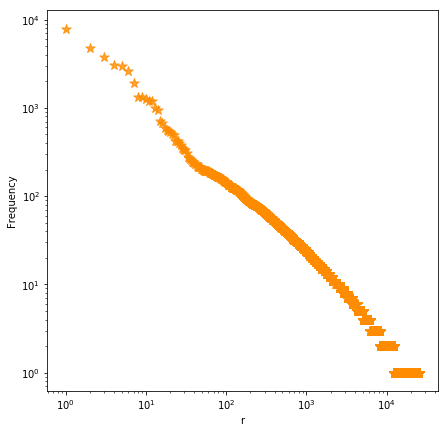

In [0]:
ocorrenciaTotal = len(palavrasTokenizadas)
try_words = Counter(palavrasTokenizadas)

as_50_mais = try_words.most_common()
ranked = 1
tabela = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

tabela['Word'] = [p[0] for p in as_50_mais]
tabela['Frequency'] = [p[1] for p in as_50_mais]
tabela['r'] = [r + 1 for r in range(0, len(as_50_mais))]
tabela['Pr(%)'] = [round((p[1] / ocorrenciaTotal) *100, 2) for p in as_50_mais]
tabela['r.Pr'] = round((tabela['Pr(%)']/100)*tabela['r'], 3)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", tabela, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

Para comparação deste gráfico com o gráfico abaixo, do Lab passado, e notável uma maior imutabilidade na disposição das palavras no gráfico. Isso acontece graças a uma maior afluência de dados, visto que diante disso há um ajuntamento das palavras a partir dos radicais.

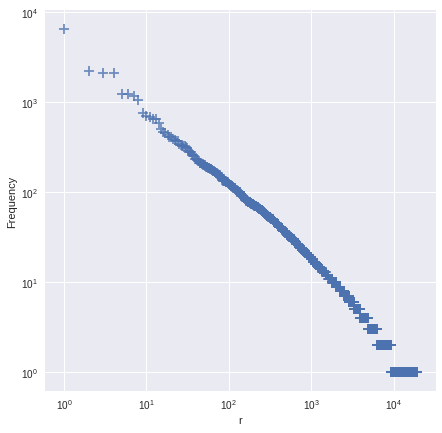

In [0]:
f, ax = plt.subplots(figsize=(7, 7))

ax.set(xscale="log", yscale="log")

sns.regplot("r", "Frequency", tabela, ax=ax, marker="+", fit_reg = False,scatter_kws={"s": 100})